In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from models.tfkeras_simplified_resnet import build_simplified_resnet

%matplotlib inline

In [2]:
tf.keras.backend.clear_session()

simplified_resnet_antisymmetric = build_simplified_resnet(image_size=(28,28,1),
                                                          num_classes=10,
                                                          architecture='antisymmetric',
                                                          use_batch_norm=False,
                                                          use_max_pooling=True,
                                                          subtract_mean=127.5,
                                                          divide_by_stddev=127.5)

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
simplified_resnet_antisymmetric.compile(optimizer='adam',
                                        loss='sparse_categorical_crossentropy',
                                        metrics=['accuracy'])

simplified_resnet_antisymmetric.fit(x_train, y_train, batch_size=32, epochs=1)
simplified_resnet_antisymmetric.evaluate(x_test, y_test)

Epoch 1/1
10000/10000 [==============================] - 17s 2ms/step

[0.07925227584782987, 0.9754]

In [11]:
i = np.random.randint(x_train.shape[0])

y_pred = simplified_resnet_antisymmetric.predict([[x_train[i]]])

np.set_printoptions(suppress=True, precision=4)

print('image name:\t{}'.format(i))
print('ground truth:\t{}'.format(y_train[i]))
print()
print('prediction:')
for k in range(len(y_pred[0])):
    print('{}:\t{:.2f}'.format(k, y_pred[0][k]))

image name:	55428
ground truth:	5

prediction:
0:	0.00
1:	0.00
2:	0.00
3:	0.00
4:	0.00
5:	0.99
6:	0.00
7:	0.00
8:	0.01
9:	0.00


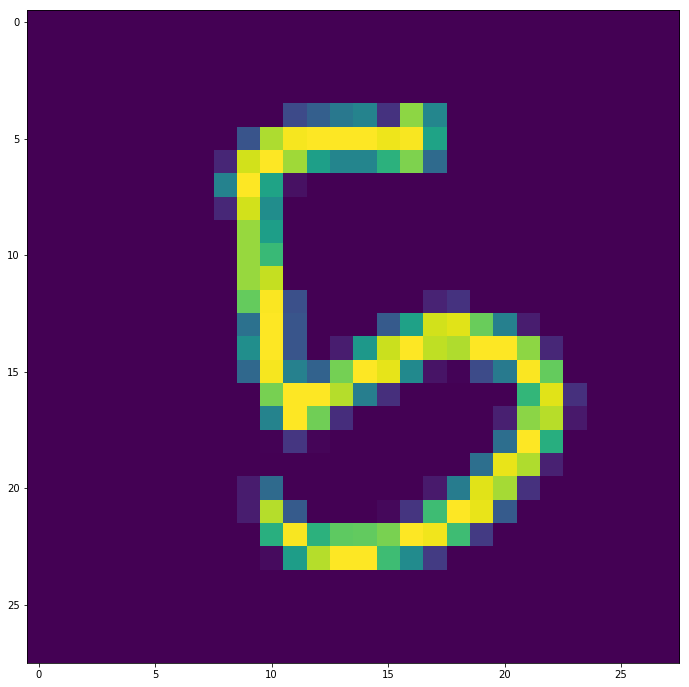

In [12]:
plt.figure(figsize=(20,12))
plt.imshow(np.squeeze(x_train[i]))

In [13]:
res2a_branch2 = simplified_resnet_antisymmetric.get_layer('res2a_branch2')
res2d_branch2 = simplified_resnet_antisymmetric.get_layer('res2d_branch2')

res2a_branch2_kernel = res2a_branch2.get_kernel()
res2d_branch2_kernel = res2d_branch2.get_kernel()

print(res2a_branch2_kernel[:,:,1,1])
print()
print(res2d_branch2_kernel[:,:,1,1])

[[ 0.0452 -0.0144  0.0407]
 [ 0.1174  0.     -0.1174]
 [-0.0407  0.0144 -0.0452]]

[[-0.002  -0.0845 -0.1493]
 [-0.0401  0.      0.0401]
 [ 0.1493  0.0845  0.002 ]]
